# Fixed point with ComputationThruDynamicsBenchmark

##Preparing the environment

In [ ]:
# @markdown Colab // Kaggle installation (Part 1)

! git clone https://github.com/neuromatch/ComputationThruDynamicsBenchmark
%cd ComputationThruDynamicsBenchmark
! pip install -e .

## RUN THIS CELL, THEN RESTART SESSION AS PROMPTED (BUTTON AT BOTTOM OF THIS CELL'S FINISHED OUTPUT). DO NOT NEED TO RUN AGAIN
## PLEASE RESTART THE ENVIRONMENT FOR KAGGLE MANUALLY (Run > Restart & clear cell outputs)

In [ ]:
# @markdown Colab // Kaggle installation (Part 2)

!pip uninstall -y torchaudio torchvision

In [ ]:
# @markdown Colab // Kaggle installation (Part 4)

!git clone https://github.com/mitchellostrow/DSA
%cd DSA/
!pip install -e .

In [2]:
# @markdown Colab // Kaggle installation (Part 3)

## GET BACK TO THE DIRECTORY AND CONFIGURE .env

################ COLAB #####################

%cd /content/ComputationThruDynamicsBenchmark/
envStr = """HOME_DIR=/content/ComputationThruDynamicsBenchmark/
#Don't change these
TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
EVAL_TARGET_FILE=eval_target.h5
# """

#############################################

################ KAGGLE #####################

# %cd /kaggle/working/ComputationThruDynamicsBenchmark/
# envStr = """HOME_DIR=/kaggle/working/ComputationThruDynamicsBenchmark/
# #Don't change these
# TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
# EVAL_TARGET_FILE=eval_target.h5
# """

##############################################

################ COLAB // KAGGLE #####################

with open('.env','w') as f:
  f.write(envStr)

##############################################

/content/ComputationThruDynamicsBenchmark


In [3]:
# set the random seed for reproducibility
import random
import dotenv
import pathlib
import os
import logging

# comment the next three lines if you want to see all training logs
pl_loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict if 'pytorch_lightning' in name]
for pl_log in pl_loggers:
    logging.getLogger(pl_log.name).setLevel(logging.WARNING)

random.seed(2024)

dotenv.load_dotenv(override=True)
HOME_DIR = os.getenv("HOME_DIR")
if HOME_DIR is None:
    HOME_DIR = ""
print(HOME_DIR)

/content/ComputationThruDynamicsBenchmark/


In [6]:
import torch
import contextlib
import io
import matplotlib.pyplot as plt
from ctd.comparison.analysis.tt.tt import Analysis_TT

## Loading model

model.pkl and datamodule_sim.pkl is needed.

In [11]:
# model saved as .pkl
fpath_RNN = HOME_DIR + "models_RNN/"
# Create the analysis object:
analysis_RNN = Analysis_TT(
    run_name = "GRU_128_3bff",
    filepath = fpath_RNN)

## Fixed-point finding

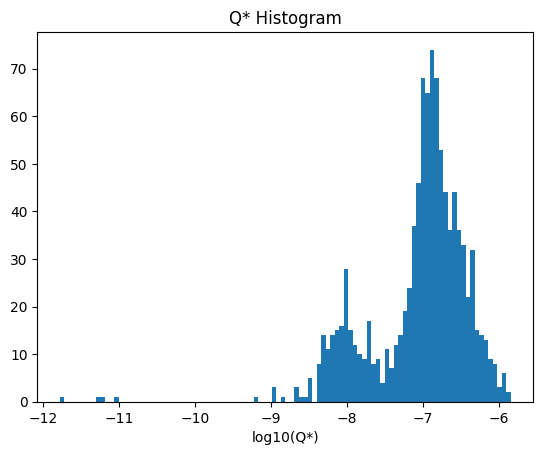

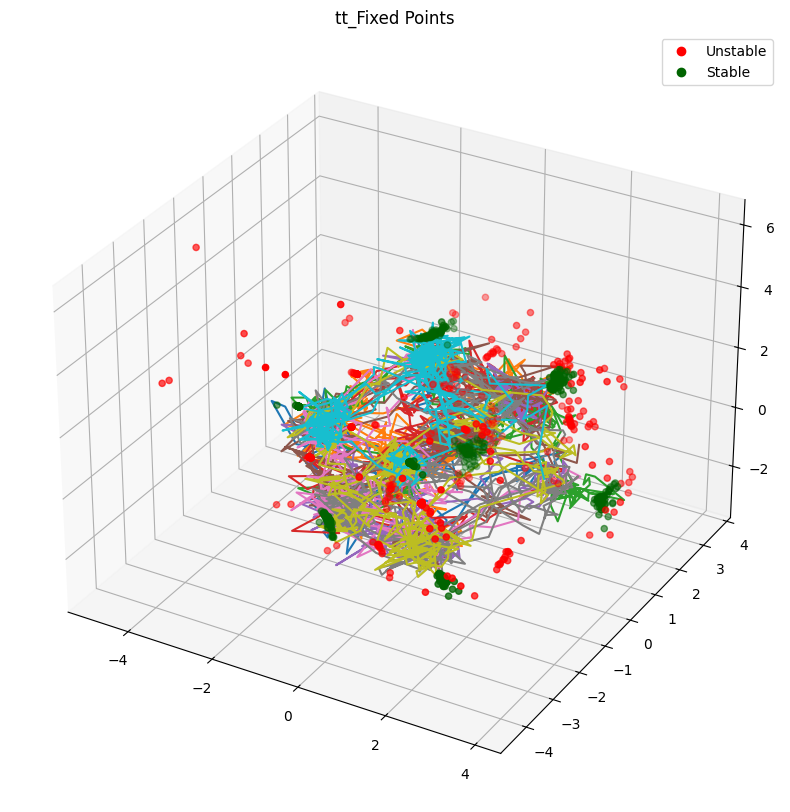

In [12]:
with contextlib.redirect_stdout(io.StringIO()): #to suppress output
    fps = analysis_RNN.plot_fps(
        inputs= torch.zeros(3),
        n_inits=1024,
        learning_rate=1e-3,
        noise_scale=0.0,
        max_iters=20000,
        seed=0,
        compute_jacobians=True,
        q_thresh=1e-5,
    )

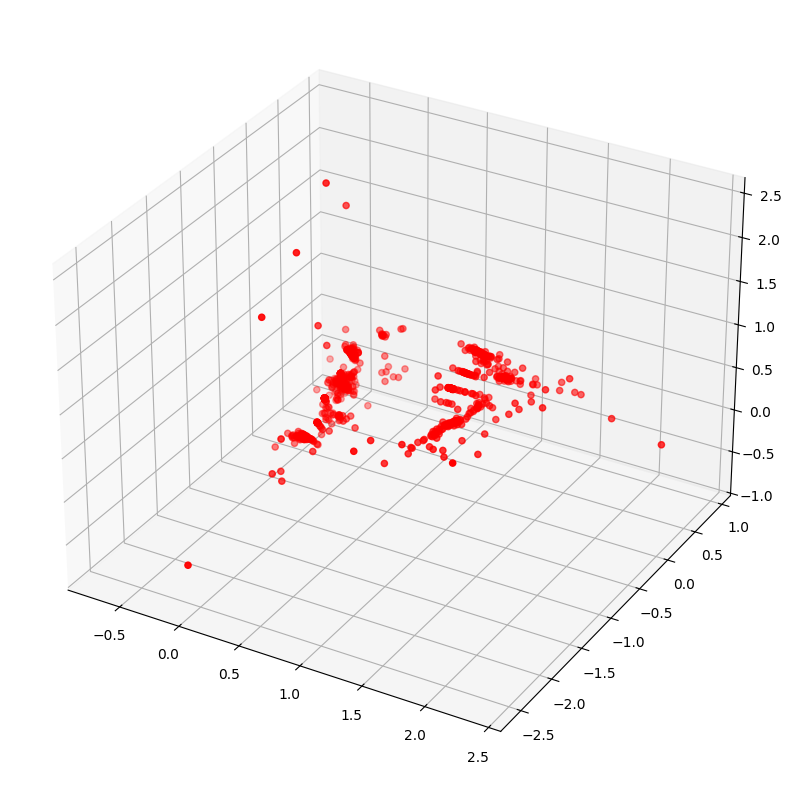

In [13]:
q_thesh = 1e-6
q_vals = fps.qstar
x_star = fps.xstar[q_vals < q_thesh]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_star[:, 0], x_star[:, 1], x_star[:, 2], c='r', marker='o')
fig.show()